In [61]:
import pandas as pd
import geopandas as gp
import geocoder 
from shapely.geometry import Point
%matplotlib inline
pd.set_option('max_columns',500)

In [10]:
hi = pd.read_csv('C:/Users/ramu225/University of Kentucky/Erhardt, Greg - SF-TNC/Data/HousingInventory/sfhousingcompletesthrough2011.csv')

In [6]:
hu10 = gp.read_file('E:/Transit-Casa-Alex/Output/Census Block Data/Census_Block_Data.shp')

In [7]:
hu10.head()

,ALAND10,AWATER10,BLOCKCE,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,COUNTYFP_1,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,EMP_WAC,FUNCSTAT10,GEOID10,HOUSING10,INTPTLAT10,INTPTLON10,LEISER_RAC,LEISER_WAC,MTFCC10,NAME10,OTHER_RAC,OTHER_WAC,PARTFLG,POP10,RETAIL_RAC,RETAIL_WAC,STATEFP10_,STATEFP1_1,TRACTCE10_,TRACTCE1_1,UACE10,UATYP10,UR10,Unnamed_ 0,Unnamed__1,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode
0,13606.0,0.0,3028,3028.0,6.075031e+13,6.075031e+13,075,75.0,5.0,0.0,28.0,4.0,S,6.075031e+13,33,37.711634,-122.468893,7.0,0.0,G5040,Block 3028,13.0,4.0,N,116,3.0,0.0,06,6.0,031302,31302.0,78904.0,U,U,4707.0,4707.0,20160228.0,20160228.0,"POLYGON ((-122.469306 37.712526, -122.468748 3...","POLYGON ((-122.469306 37.712526, -122.468748 3...",6.075031e+13,6.075031e+13
1,133856.0,0.0,6025,6025.0,6.075026e+13,6.075026e+13,075,75.0,2.0,0.0,13.0,4.0,S,6.075026e+13,1,37.725038,-122.444836,3.0,0.0,G5040,Block 6025,8.0,1.0,N,1,0.0,3.0,06,6.0,025500,25500.0,78904.0,U,U,1287.0,1287.0,20160228.0,20160228.0,"POLYGON ((-122.442387 37.725793, -122.443066 3...","POLYGON ((-122.442387 37.725793, -122.443066 3...",6.075026e+13,6.075026e+13
2,14510.0,0.0,1010,1010.0,6.075026e+13,6.075026e+13,075,75.0,24.0,0.0,118.0,2.0,S,6.075026e+13,64,37.721304,-122.439586,16.0,0.0,G5040,Block 1010,66.0,2.0,N,237,12.0,0.0,06,6.0,026100,26100.0,78904.0,U,U,4710.0,4710.0,20160228.0,20160228.0,"POLYGON ((-122.439127 37.720972, -122.439382 3...","POLYGON ((-122.439127 37.720972, -122.439382 3...",6.075026e+13,6.075026e+13
3,10639.0,0.0,1001,1001.0,6.075020e+13,6.075020e+13,075,75.0,0.0,0.0,1.0,115.0,S,6.075020e+13,0,37.774160,-122.419404,0.0,0.0,G5040,Block 1001,1.0,36.0,N,0,0.0,79.0,06,6.0,020100,20100.0,78904.0,U,U,1516.0,1516.0,20160228.0,20160228.0,"POLYGON ((-122.418618 37.773053, -122.418855 3...","POLYGON ((-122.418618 37.773053, -122.418855 3...",6.075020e+13,6.075020e+13
4,14524.0,0.0,2006,2006.0,6.075018e+13,6.075018e+13,075,75.0,4.0,0.0,17.0,296.0,S,6.075018e+13,145,37.774138,-122.412692,2.0,2.0,G5040,Block 2006,9.0,263.0,N,196,2.0,31.0,06,6.0,017802,17802.0,78904.0,U,U,1294.0,1294.0,20160228.0,20160228.0,"POLYGON ((-122.413587 37.77466, -122.413161 37...","POLYGON ((-122.413587 37.77466, -122.413161 37...",6.075018e+13,6.075018e+13


In [151]:
hi.YEAR.unique()

array([2009], dtype=int64)

In [150]:
hu09 = hi[hi['YEAR'] == 2011]

In [149]:
hu09.head()

,X,Y,OBJECTID_1,OBJECTID,PLANAREA,ACTDATE,YEAR,APP_NO,APP_ID,NUMBER,STREET,ST_TYPE,DESCRIPT,PROP_USE,PD,SD,BLOCK,LOT,BLOCKLOT,NETUNITS,UNITS,FILEDT,FM,EXT_USE,ACTION,ZONING,STAFF,AFFORD,HEIGHT,AFF_HSG,DEV_NAME,AFF_NOTES,AFF_TARGET,MERGELEGAL,GENZONE,TENURE,AFF_GROUP,ADDRESS,supervisor,supname,Distance


In [14]:
len(hu09)

260

In [27]:
add = geocoder.google('3676 20TH ST San Francisco, Ca')

In [28]:
add.lat

37.758642

In [91]:
#there was one address that initially had 08th instead of 8th
hu09['STREET'].loc[157] = '8TH'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [92]:
str(hu09['NUMBER'][0]) + ' '+ str(hu09['STREET'][0]) + ' ' + str(hu09['ST_TYPE'][0]) + ' San Francisco, CA'

'3676 20TH ST San Francisco, CA'

In [93]:
def combine_address(row):
    address = str(row['NUMBER']) + ' '+ str(row['STREET']) + ' ' + str(row['ST_TYPE']) + ' San Francisco, CA'
    return address

In [94]:
hu09['ADDRESS'] = hu09.apply(lambda row: combine_address(row),axis = 1)

In [95]:
hu09.head()

,X,Y,OBJECTID_1,OBJECTID,PLANAREA,ACTDATE,YEAR,APP_NO,APP_ID,NUMBER,STREET,ST_TYPE,DESCRIPT,PROP_USE,PD,SD,BLOCK,LOT,BLOCKLOT,NETUNITS,UNITS,FILEDT,FM,EXT_USE,ACTION,ZONING,STAFF,AFFORD,HEIGHT,AFF_HSG,DEV_NAME,AFF_NOTES,AFF_TARGET,MERGELEGAL,GENZONE,TENURE,AFF_GROUP,ADDRESS,supervisor,supname,Distance,LAT,LON,geometry
0,6005822.338,2104358.321,389,608,Mission,6/1/2009,2009,2.010000e+11,657033.0,3676,20TH,ST,"ADD STORY TO HOUSE, MAKE 2 UNITS. REVISION TO...",2 FAMILY DWELLING,8,8,3597,26,3597026,1,2,3/6/2008,8,1 FAMILY DWELLING,FINAL INSPECT/APPRVD,RTO-Mission,MWOODS,NaN,55-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3676 20TH ST San Francisco, CA",NaN,NaN,NaN,37.758642,-122.422981,POINT (-122.422981 37.758642)
1,6000451.148,2114764.120,4139,969,NaN,7/1/2009,2009,2.010000e+11,600372.0,2815,PINE,ST,TO COMPLY WITH HIS NOV 199602226. LEGALIZE SEC...,2 FAMILY DWELLING,5,5,1048,34,1048034,1,2,28/11/2006,3,1 FAMILY DWELLING,CFC ISSUED,RH-2,DLINDSAY,NaN,40-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2815 PINE ST San Francisco, CA",NaN,NaN,NaN,37.786599,-122.442827,POINT (-122.4428273 37.7865992)
2,5992750.911,2104090.111,23,913,NaN,8/1/2009,2009,2.000000e+11,515343.0,1675,11TH,AV,HORIZONTAL AND VERTICAL ADDITION WHILE ADDING ...,2 FAMILY DWELLING,14,7,1932,13,1932013,1,2,15/06/2004,3,1 FAMILY DWELLING,PRE-FINAL,RH-2,MSMITH,NaN,40-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1675 11TH AV San Francisco, CA",NaN,NaN,NaN,37.756974,-122.468210,POINT (-122.4682095 37.7569743)
3,6005733.081,2100189.099,409,929,NaN,8/1/2009,2009,2.010000e+11,565195.0,119,27TH,ST,SCOPE IS TO LEGALIZE /CONVERT GRD FL CHURCH SP...,2 FAMILY DWELLING,7,8,6594,43,6594043,1,2,23/11/2005,3,1 FAMILY DWELLING,FINAL INSPECT/APPRVD,RH-2,TWANG,NaN,40-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"119 27TH ST San Francisco, CA",NaN,NaN,NaN,37.747064,-122.422995,POINT (-122.4229951 37.7470638)
4,6008647.518,2101419.641,1472,607,Mission,8/1/2009,2009,2.010000e+11,614915.0,1218,TREAT,AV,ERECT 3 STORY TYPE 5 2 FAMILY DWELLINGS,2 FAMILY DWELLING,1,9,6524,4,6524004,2,2,2/5/2007,2,NaN,CFC ISSUED,RH-2,EOROPEZA,NaN,40-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1218 TREAT AV San Francisco, CA",NaN,NaN,NaN,37.750623,-122.413104,POINT (-122.413104 37.750623)


In [152]:
hu09['LAT'] = hu09['ADDRESS'].apply(lambda value: geocoder.google(value).lat)

In [56]:
t= geocoder.google(hu09['ADDRESS'][0])


In [153]:
hu09['LON'] = hu09['ADDRESS'].apply(lambda value:  geocoder.google(value).lng)

In [58]:
t.geometry

{'coordinates': [-122.422981, 37.758642], 'type': 'Point'}

In [59]:
#hu09['geometry'] = hu09['ADDRESS'].apply(lambda value: geocoder.google(value).geometry)

In [154]:
hu09['geometry'] = [Point(xy) for xy in zip(hu09.LON, hu09.LAT)]

In [155]:
hu09['LAT'].head()

Series([], Name: LAT, dtype: float64)

In [99]:
hu09_geo = gp.GeoDataFrame(hu09)

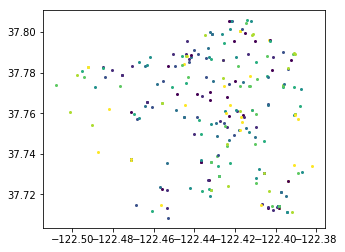

In [100]:
hu09_geo.plot()

In [101]:
len(hu09)

260

In [86]:
hu09_geo.to_file('housing_units_change09.shp',driver = 'ESRI Shapefile')

In [108]:
hu09_geo.crs = hu10.crs

In [111]:
final = gp.sjoin(hu10,hu09_geo, how= 'inner', op = 'intersects')

In [112]:
final.head()

,ALAND10,AWATER10,BLOCKCE,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,COUNTYFP_1,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,EMP_WAC,FUNCSTAT10,GEOID10,HOUSING10,INTPTLAT10,INTPTLON10,LEISER_RAC,LEISER_WAC,MTFCC10,NAME10,OTHER_RAC,OTHER_WAC,PARTFLG,POP10,RETAIL_RAC,RETAIL_WAC,STATEFP10_,STATEFP1_1,TRACTCE10_,TRACTCE1_1,UACE10,UATYP10,UR10,Unnamed_ 0,Unnamed__1,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode,index_right,X,Y,OBJECTID_1,OBJECTID,PLANAREA,ACTDATE,YEAR,APP_NO,APP_ID,NUMBER,STREET,ST_TYPE,DESCRIPT,PROP_USE,PD,SD,BLOCK,LOT,BLOCKLOT,NETUNITS,UNITS,FILEDT,FM,EXT_USE,ACTION,ZONING,STAFF,AFFORD,HEIGHT,AFF_HSG,DEV_NAME,AFF_NOTES,AFF_TARGET,MERGELEGAL,GENZONE,TENURE,AFF_GROUP,ADDRESS,supervisor,supname,Distance,LAT,LON
55,13726.0,0.0,1012,1012.0,6.075018e+13,6.075018e+13,075,75.0,7.0,0.0,42.0,79.0,S,6.075018e+13,57,37.776712,-122.409445,6.0,0.0,G5040,Block 1012,27.0,73.0,N,94,2.0,6.0,06,6.0,017802,17802.0,78904.0,U,U,241.0,241.0,20160228.0,20160228.0,"POLYGON ((-122.40838 37.776318, -122.408846 37...","POLYGON ((-122.40838 37.776318, -122.408846 37...",6.075018e+13,6.075018e+13,114,6009907.719,2110965.153,3729,738,Western SoMa,4/6/2009,2009,2.010000e+11,569570.0,50,LANGTON,ST,"ERECT 4 STORY, 3 DWELLING UNIT NEW BUILDING.",APARTMENTS,9,6,3730,99,3730099,3,3,20/01/2006,2,NaN,CFC ISSUED,RED,KDURANDE,NaN,40-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"50 LANGTON ST San Francisco, CA",NaN,NaN,NaN,37.776886,-122.409111
58,17197.0,0.0,2000,2000.0,6.075021e+13,6.075021e+13,075,75.0,26.0,0.0,151.0,23.0,S,6.075021e+13,121,37.761134,-122.417648,22.0,8.0,G5040,Block 2000,93.0,15.0,N,382,10.0,0.0,06,6.0,020800,20800.0,78904.0,U,U,1243.0,1243.0,20160228.0,20160228.0,"POLYGON ((-122.417179 37.761968, -122.417026 3...","POLYGON ((-122.417179 37.761968, -122.417026 3...",6.075021e+13,6.075021e+13,187,6007482.819,2105309.320,1476,613,Mission,6/10/2009,2009,2.010000e+11,578109.0,746,SOUTH VAN NESS,AV,"DEMOLISH 2 STORY, 2 DWELLING UNITS.",NaN,8,9,3590,004A,3590004A,-2,-2,26/04/2006,6,2 FAMILY DWELLING,FINAL INSPECT/APPRVD,RTO-Mission,JPURVIS,NaN,50-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"746 SOUTH VAN NESS AV San Francisco, CA",NaN,NaN,NaN,37.761217,-122.417504
109,16016.0,0.0,1004,1004.0,6.075018e+13,6.075018e+13,075,75.0,11.0,4.0,51.0,46.0,S,6.075018e+13,84,37.778765,-122.403723,8.0,0.0,G5040,Block 1004,31.0,42.0,N,127,1.0,0.0,06,6.0,017802,17802.0,78904.0,U,U,1852.0,1852.0,20160228.0,20160228.0,"POLYGON ((-122.402658 37.779683, -122.402518 3...","POLYGON ((-122.402658 37.779683, -122.402518 3...",6.075018e+13,6.075018e+13,14,6011296.250,2111496.430,3698,654,East SoMa,20/01/2009,2009,2.010000e+11,552560.0,279,SHIPLEY,ST,1ST FLOOR REMODEL. CONVERT 2 EXIST. STORAGES T...,APARTMENTS,9,6,3753,83,3753083,2,6,21/07/2005,3,APARTMENTS,CFC ISSUED,MUR,KMCGEE,NaN,45-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"279 SHIPLEY ST San Francisco, CA",NaN,NaN,NaN,37.778358,-122.404432
204,15375.0,0.0,2000,2000.0,6.075016e+13,6.075016e+13,075,75.0,22.0,3.0,86.0,22.0,S,6.075016e+13,103,37.777851,-122.434135,10.0,0.0,G5040,Block 2000,49.0,19.0,N,219,5.0,0.0,06,6.0,015802,15802.0,78904.0,U,U,3690.0,3690.0,20160228.0,20160228.0,"POLYGON ((-122.433219 37.77749, -122.434864 37...","POLYGON ((-122.433219 37.77749, -122.434864 37...",6.075016e+13,6.075016e+13,182,6002673.791,2111602.932,4716,964,NaN,29/09/2009,2009,2.010000e+11,637924.0,1357,MCALLISTER,ST,LEGALIZE 4TH UNIT AT GROUND FLOOR. THERE IS N...,APARTMENTS,5,5,778,15,778015,1,4,19/11/2007,3,APARTMENTS,PRE-FINAL,RM-1,CLAMOREN,NaN,40-X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1357 MCALLISTER ST San Francisco, CA",NaN,NaN,NaN,37.778023,-122.434292
248,7642.0,0.0,2001,2001.0,6.075020e+13,6.075020e+13,075,75.0,12.0,NaN,43.0,NaN,S,6.075020e+13,63,37.758167,-122.445258,5.0,NaN,G5040,Block 2001,25.0,NaN,N,87,1.0,NaN,06,6.0,020401,20401.0,78904.0,U,U,733.0,733.0,NaN,20160228.0,"POLYGON ((-122.446021 37.758722, -122.445863 3...","POLYGON ((-122.446021 37.758722, -122.445863 3...",6.075020e+13,NaN,137,5999393.464,2104426.280,422,996,NaN,22/07/2009,2009,2.010000e+11

In [118]:
net_change = final[['NETUNITS','GEOID10']].groupby(by = 'GEOID10',as_index = False).sum()

In [121]:
final2 = pd.merge(hu10,net_change,how='left',on= 'GEOID10')

In [134]:
final2.head(20)

,ALAND10,AWATER10,BLOCKCE,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,COUNTYFP_1,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,EMP_WAC,FUNCSTAT10,GEOID10,HOUSING10,INTPTLAT10,INTPTLON10,LEISER_RAC,LEISER_WAC,MTFCC10,NAME10,OTHER_RAC,OTHER_WAC,PARTFLG,POP10,RETAIL_RAC,RETAIL_WAC,STATEFP10_,STATEFP1_1,TRACTCE10_,TRACTCE1_1,UACE10,UATYP10,UR10,Unnamed_ 0,Unnamed__1,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode,NETUNITS,HU09
0,13606.0,0.0,3028,3028.0,6.075031e+13,6.075031e+13,075,75.0,5.0,0.0,28.0,4.0,S,6.075031e+13,33,37.711634,-122.468893,7.0,0.0,G5040,Block 3028,13.0,4.0,N,116,3.0,0.0,06,6.0,031302,31302.0,78904.0,U,U,4707.0,4707.0,20160228.0,20160228.0,"POLYGON ((-122.469306 37.712526, -122.468748 3...","POLYGON ((-122.469306 37.712526, -122.468748 3...",6.075031e+13,6.075031e+13,NaN,NaN
1,133856.0,0.0,6025,6025.0,6.075026e+13,6.075026e+13,075,75.0,2.0,0.0,13.0,4.0,S,6.075026e+13,1,37.725038,-122.444836,3.0,0.0,G5040,Block 6025,8.0,1.0,N,1,0.0,3.0,06,6.0,025500,25500.0,78904.0,U,U,1287.0,1287.0,20160228.0,20160228.0,"POLYGON ((-122.442387 37.725793, -122.443066 3...","POLYGON ((-122.442387 37.725793, -122.443066 3...",6.075026e+13,6.075026e+13,NaN,NaN
2,14510.0,0.0,1010,1010.0,6.075026e+13,6.075026e+13,075,75.0,24.0,0.0,118.0,2.0,S,6.075026e+13,64,37.721304,-122.439586,16.0,0.0,G5040,Block 1010,66.0,2.0,N,237,12.0,0.0,06,6.0,026100,26100.0,78904.0,U,U,4710.0,4710.0,20160228.0,20160228.0,"POLYGON ((-122.439127 37.720972, -122.439382 3...","POLYGON ((-122.439127 37.720972, -122.439382 3...",6.075026e+13,6.075026e+13,NaN,NaN
3,10639.0,0.0,1001,1001.0,6.075020e+13,6.075020e+13,075,75.0,0.0,0.0,1.0,115.0,S,6.075020e+13,0,37.774160,-122.419404,0.0,0.0,G5040,Block 1001,1.0,36.0,N,0,0.0,79.0,06,6.0,020100,20100.0,78904.0,U,U,1516.0,1516.0,20160228.0,20160228.0,"POLYGON ((-122.418618 37.773053, -122.418855 3...","POLYGON ((-122.418618 37.773053, -122.418855 3...",6.075020e+13,6.075020e+13,NaN,NaN
4,14524.0,0.0,2006,2006.0,6.075018e+13,6.075018e+13,075,75.0,4.0,0.0,17.0,296.0,S,6.075018e+13,145,37.774138,-122.412692,2.0,2.0,G5040,Block 2006,9.0,263.0,N,196,2.0,31.0,06,6.0,017802,17802.0,78904.0,U,U,1294.0,1294.0,20160228.0,20160228.0,"POLYGON ((-122.413587 37.77466, -122.413161 37...","POLYGON ((-122.413587 37.77466, -122.413161 37...",6.075018e+13,6.075018e+13,NaN,NaN
5,1767.0,0.0,2009,2009.0,6.075018e+13,6.075018e+13,075,75.0,NaN,0.0,NaN,1.0,S,6.075018e+13,0,37.775210,-122.406465,NaN,0.0,G5040,Block 2009,NaN,1.0,N,10,NaN,0.0,06,6.0,018000,18000.0,78904.0,U,U,1518.0,1518.0,20160228.0,NaN,"POLYGON ((-122.406296 37.775514, -122.406105 3...","POLYGON ((-122.406296 37.775514, -122.406105 3...",NaN,6.075018e+13,NaN,NaN
6,13883.0,0.0,2017,2017.0,6.075062e+13,6.075062e+13,075,75.0,NaN,114.0,NaN,400.0,S,6.075062e+13,114,37.784782,-122.396854,NaN,0.0,G5040,Block 2017,NaN,284.0,N,99,NaN,2.0,06,6.0,061500,61500.0,78904.0,U,U,461.0,461.0,20160228.0,NaN,"POLYGON ((-122.395896 37.784897, -122.39666 37...","POLYGON ((-122.395896 37.784897, -122.39666 37...",NaN,6.075062e+13,NaN,NaN
7,17477.0,0.0,4003,4003.0,6.075021e+13,6.075021e+13,075,75.0,32.0,10.0,138.0,129.0,S,6.075021e+13,82,37.753004,-122.419075,26.0,61.0,G5040,Block 4003,71.0,27.0,N,203,9.0,31.0,06,6.0,020900,20900.0,78904.0,U,U,412.0,412.0,20160228.0,20160228.0,"POLYGON ((-122.419018 37.752204, -122.419557 3...","POLYGON ((-122.419018 37.752204, -122.419557 3...",6.075021e+13,6.075021e+13,NaN,NaN
8,16892.0,0.0,1008,1008.0,6.075025e+13,6.075025e+13,075,75.0,29.0,0.0,104.0,5.0,S,6.075025e+13,96,37.746689,-122.417110,11.0,0.0,G5040,Block 1008,60.0,5.0,N,205,4.0,0.0,06,6.0,025200,25200.0,78904.0,U,U,1522.0,1522.0,20160228.0,20160228.0,"POLYGON ((-122.417823 37.745957, -122.418285 3...","POLYGON ((-122.417823 37.745957, -122.418285 3...",6.075025e+13,6.075025e+13,NaN,NaN
9,34268.0,0.0,2002,2002.0,6.075025e+13,6.075025e+13,075,75.0,29.0,3.0,162.0,7.0,S,6.075025e+13,135,37.745288,-122.412642,19.0,2.0,G5040,Block 2002,100.0,2.0,N,277,14.0,0.0,06,6.0,025200,25200.0,78904.0,U,U,5108.0,5108.0,20160228.0,20

In [138]:
final2 ['NETUNITS'] = final2.NETUNITS.fillna(0)

In [142]:
final2['HU09'] = final2['HOUSING10'] + final2['NETUNITS']

In [144]:
final2.NETUNITS.unique()

array([   0.,    3.,   -2.,    2.,    1.,   -3.,   23.,    6.,    8.,
         -1.,    7.,  440.,   53.,   69.,    5.,  -11.,  413.,  420.,
         50.,   35.,   12.,   -6.,   -5.,   75.,  136.,   67.,  138.,
         -4.,   83.,   65.,  122.,   48.,    9.,   11.,    4.,   18.,
        192.,   98.,   56.])

In [146]:
final2['HU09'] = final2['HU09'].clip(lower = 0)

In [147]:
final2.head()

,ALAND10,AWATER10,BLOCKCE,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,COUNTYFP_1,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,EMP_WAC,FUNCSTAT10,GEOID10,HOUSING10,INTPTLAT10,INTPTLON10,LEISER_RAC,LEISER_WAC,MTFCC10,NAME10,OTHER_RAC,OTHER_WAC,PARTFLG,POP10,RETAIL_RAC,RETAIL_WAC,STATEFP10_,STATEFP1_1,TRACTCE10_,TRACTCE1_1,UACE10,UATYP10,UR10,Unnamed_ 0,Unnamed__1,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode,NETUNITS,HU09
0,13606.0,0.0,3028,3028.0,6.075031e+13,6.075031e+13,075,75.0,5.0,0.0,28.0,4.0,S,6.075031e+13,33,37.711634,-122.468893,7.0,0.0,G5040,Block 3028,13.0,4.0,N,116,3.0,0.0,06,6.0,031302,31302.0,78904.0,U,U,4707.0,4707.0,20160228.0,20160228.0,"POLYGON ((-122.469306 37.712526, -122.468748 3...","POLYGON ((-122.469306 37.712526, -122.468748 3...",6.075031e+13,6.075031e+13,0.0,33.0
1,133856.0,0.0,6025,6025.0,6.075026e+13,6.075026e+13,075,75.0,2.0,0.0,13.0,4.0,S,6.075026e+13,1,37.725038,-122.444836,3.0,0.0,G5040,Block 6025,8.0,1.0,N,1,0.0,3.0,06,6.0,025500,25500.0,78904.0,U,U,1287.0,1287.0,20160228.0,20160228.0,"POLYGON ((-122.442387 37.725793, -122.443066 3...","POLYGON ((-122.442387 37.725793, -122.443066 3...",6.075026e+13,6.075026e+13,0.0,1.0
2,14510.0,0.0,1010,1010.0,6.075026e+13,6.075026e+13,075,75.0,24.0,0.0,118.0,2.0,S,6.075026e+13,64,37.721304,-122.439586,16.0,0.0,G5040,Block 1010,66.0,2.0,N,237,12.0,0.0,06,6.0,026100,26100.0,78904.0,U,U,4710.0,4710.0,20160228.0,20160228.0,"POLYGON ((-122.439127 37.720972, -122.439382 3...","POLYGON ((-122.439127 37.720972, -122.439382 3...",6.075026e+13,6.075026e+13,0.0,64.0
3,10639.0,0.0,1001,1001.0,6.075020e+13,6.075020e+13,075,75.0,0.0,0.0,1.0,115.0,S,6.075020e+13,0,37.774160,-122.419404,0.0,0.0,G5040,Block 1001,1.0,36.0,N,0,0.0,79.0,06,6.0,020100,20100.0,78904.0,U,U,1516.0,1516.0,20160228.0,20160228.0,"POLYGON ((-122.418618 37.773053, -122.418855 3...","POLYGON ((-122.418618 37.773053, -122.418855 3...",6.075020e+13,6.075020e+13,0.0,0.0
4,14524.0,0.0,2006,2006.0,6.075018e+13,6.075018e+13,075,75.0,4.0,0.0,17.0,296.0,S,6.075018e+13,145,37.774138,-122.412692,2.0,2.0,G5040,Block 2006,9.0,263.0,N,196,2.0,31.0,06,6.0,017802,17802.0,78904.0,U,U,1294.0,1294.0,20160228.0,20160228.0,"POLYGON ((-122.413587 37.77466, -122.413161 37...","POLYGON ((-122.413587 37.77466, -122.413161 37...",6.075018e+13,6.075018e+13,0.0,145.0


In [ ]:
f